## $PageRank$

---




Pemblokiran indentasi
Jika seorang individu mengetikkan sesuatu yang sama di beberapa
mesin pencari, maka hasil yang ditampilkan pada setiap mesin pencari tidak akan persis
sama. Ini disebabkan algoritma yang berbeda yang digunakan oleh masing-masing mesin
pencari. Salah satu mesin pencari paling terkenal, Google, menggunakan algoritma yang
disebut PageRank. Algoritma ini mendapatkan namanya dari salah satu pendiri Google,
Larry Page.PageRank bekerja dengan memberikan nilai peringkat (rank) kepada setiap halaman web berdasarkan sejumlah faktor,
terutama jumlah dan kualitas tautan yang mengarah ke halaman tersebut.










## $Algoritma$ $PageRank$

#1. Inisialisasi Nilai PageRank:

Setiap halaman web diberikan nilai PageRank awal, biasanya sama untuk semua halaman atau dapat diatur secara manual.

#2  Iterasi:

PageRank dihitung secara iteratif. Proses ini berulang hingga konvergensi, di mana perubahan nilai PageRank antara iterasi menjadi sangat kecil.

#3  Perhitungan Nilai PageRank:

Nilai PageRank halaman
$\text{i}$ pada iterasi $\text{t+1}$ dihitung berdasarkan nilai PageRank halaman  $\text{i}$ pada iterasi  $\text{t}$ dan kontribusi dari halaman-halaman lain yang terhubung ke halaman tersebut.

Rumus PageRank dapat dituliskan sebagai berikut:

\begin{equation}
\text{PR}(u) = \frac{(1-d)}{N} + d \sum_{v \in B_u} \frac{\text{PR}(v)}{L(v)}
\end{equation}

$\text{PR}(u)$ adalah PageRank dari halaman $u$

$d$ adalah faktor damping (biasanya diatur antara 0.85)

$N$ adalah jumlah total halaman dalam graf

$B_u$ adalah himpunan halaman yang menghubungi $u$ (mengandung tautan ke $u$)

$L(v)$ adalah jumlah tautan keluar dari halaman $v$.

#4  Iterasi Berlanjut:

Langkah 3 diulangi sampai nilai PageRank konvergen atau perubahan antar iterasi menjadi sangat kecil.
Faktor damping $d$ diperkenalkan untuk mengatasi masalah ketidakseimbangan dalam struktur tautan yang dapat menyebabkan iterasi tak hingga atau konvergensi yang lambat.






## $Implementasi$
Setelah mengetahui Pagerank dan Algoritmanya maka saatnya untuk crawl berita, berita yang digunakan adalah berita bola
pada situs berita online bisnis.com, untuk mengetahui kata penting
dalam suatu berita menggunakan pemrograman yang kemudian diakhir akan dibandingkan dengan pehtiungan manual algoritma PageRank yang sudah dijelaskan sebelumnya

In [ ]:
import pandas as pd

In [ ]:
# menghubungkan ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas-ppw/data_tugas4/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Prediksi Skor Atalanta vs Juventus: Head to He...,"Bisnis.com, SOLO - Duel Atalanta vs Juventus a...",Sport
1,01-10-2023,Hasil Drawing dan Jadwal Bulu Tangkis Asian Ga...,"Bisnis.com, SOLO - Hasil drawing dan jadwal bu...",Sport
2,01-10-2023,"Naik Podium MotoGP Setelah Setahun Absen, Marc...","Bisnis.com, JAKARTA - Pembalap Repsol Honda, M...",Sport
3,01-10-2023,"Prediksi Skor Persib vs Persita: Head to Head,...","Bisnis.com, SOLO - Persib vs Persita akan menj...",Sport
4,01-10-2023,"Prediksi Persib vs Persita, Pelatih Minta Maun...","Bisnis.com, JAKARTA - Jelang Persib vs Persita...",Sport
...,...,...,...,...
625,01-11-2023,"Kemiskinan di Kota Malang Turun Jadi 4,26% Tah...","Bisnis.com, MALANG — Kemiskinan di Kota Malang...",Surabaya
626,01-11-2023,Tingkat Penghunian Kamar Hotel di Malang Tembu...,"Bisnis.com, MALANG — Tingkat penghunian kamar ...",Surabaya
627,01-11-2023,Beras Masih Jadi Penyumbang Utama Inflasi di K...,"Bisnis.com, MALANG — Beras masih menjadi penyu...",Surabaya
628,01-11-2023,Pertamina Catat Ada 32 Kasus Pidana Penyalahgu...,"Bisnis.com, SURABAYA — Pertamina Patra Niaga J...",Surabaya


# Pre Processing

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sampel = data.head(1)
sampel

,Date,Title,Content,Label
0,01-10-2023,Prediksi Skor Atalanta vs Juventus: Head to He...,"Bisnis.com, SOLO - Duel Atalanta vs Juventus a...",Sport


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Download stopwords dataset
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Hapus simbol dan angka menggunakan regular expression
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Gabungkan kembali kata-kata yang sudah diolah
    processed_text = ' '.join(words)

    return processed_text

def build_co_occurrence_matrix(corpus, window_size):
    # Build unique words
    unique_words = set()
    for text in corpus:
        text = preprocess_text(text)
        for word in word_tokenize(text):
            unique_words.add(word)

    word_search_dict = {word: np.zeros(shape=(len(unique_words))) for word in unique_words}
    word_list = list(word_search_dict.keys())
    for text in corpus:
        text = preprocess_text(text)
        text_list = word_tokenize(text)
        for idx, word in enumerate(text_list):
            # Pick word in the size range
            i = max(0, idx - window_size)
            j = min(len(text_list) - 1, idx + window_size)
            search = [text_list[idx_] for idx_ in range(i, j + 1)]
            search.remove(word)
            for neighbor in search:
                # Get neighbor idx in word_search_dict
                nei_idx = word_list.index(neighbor)
                word_search_dict[word][nei_idx] += 1
    return word_search_dict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
coo_dict=build_co_occurrence_matrix(sampel['Content'], window_size=1)

coo_dict

{'Fagioli': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 'Massimiliano': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
coo_df = pd.DataFrame(coo_dict,index=coo_dict.keys()).astype('int')
coo_df

,Fagioli,Massimiliano,SOLO,bersaing,berstatus,Rabiot,Rapor,kandang,diistirahatkan,Ruggeri,...,giornata,Lookman,Alex,lanjutan,mencetak,menjaringkan,Dea,Gasperini,poin,cedera
Fagioli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Massimiliano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SOLO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bersaing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
berstatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
menjaringkan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gasperini,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
poin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
coo_df.to_excel('matrix-coo-df.xlsx', index_label='Nama_Index')


# Graph

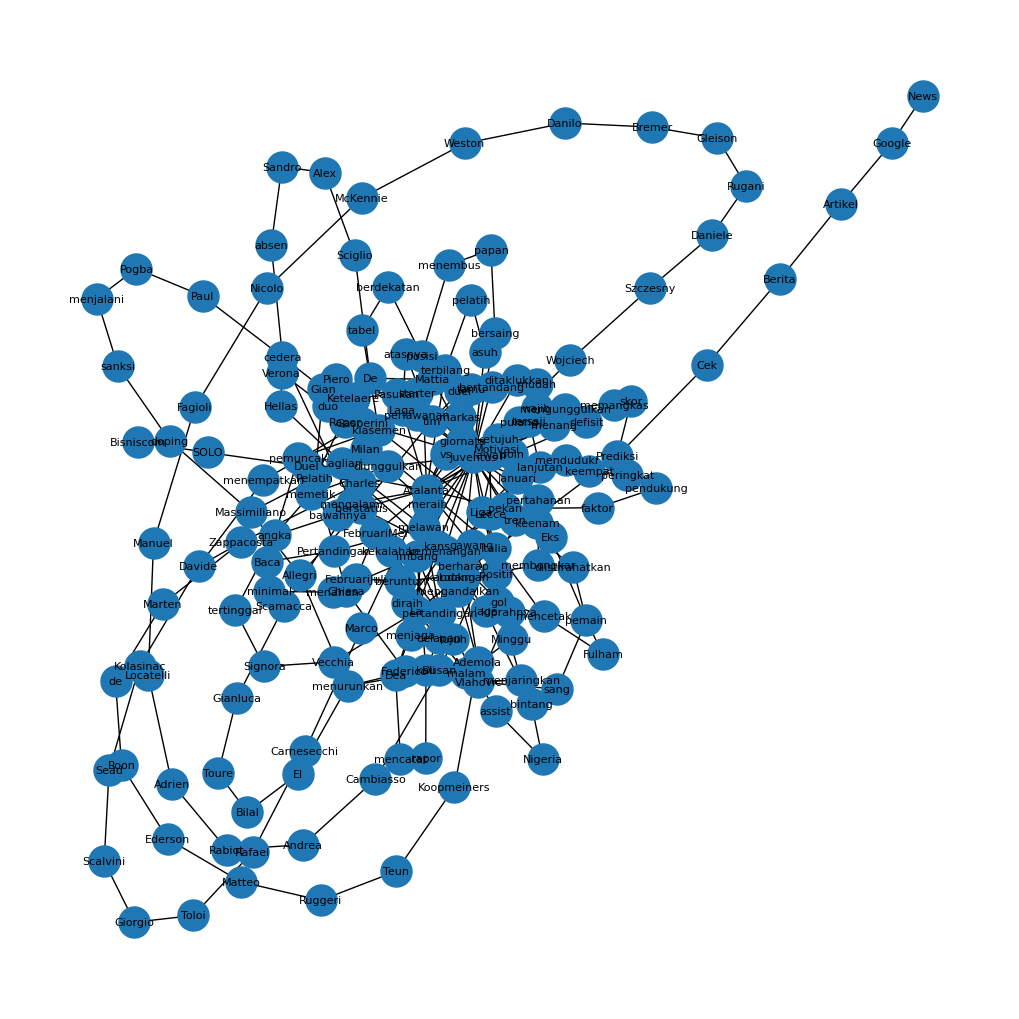

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the DataFrame to a networkx graph
G = nx.from_pandas_adjacency(coo_df)

# Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, font_color='black')
plt.show()

In [ ]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('Juventus', 0.046766114164283924),
 ('Atalanta', 0.036062230362291434),
 ('kemenangan', 0.01869525324908808)]

## Hitung Manual Menggunakan Algoritma PageRank
Dengan
$d$ adalah faktor damping (biasanya diatur 0.85)

$N$ adalah banyak term dalam dokumen $189$

 Maka didapat perhitungan manual sebagai berikut:

<table>
  <caption>Hasil Perhitungan Manual Pagerank Satu Berita Bola</caption>
  <thead>
    <tr>
      <th>Node</th>
      <th>Term</th>
      <th>Indegree</th>
      <th>Outdegree</th>
      <th>Langkah 1 (1-d)</th>
      <th>Langkah 2 (1/N)</th>
      <th>Langkah 3</th>
      <th>Iterasi 1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>juventus</td>
      <td>32</td>
      <td>32</td>
      <td>0,15</td>
      <td>0,005</td>
      <td>0,074</td>
      <td>0,064</td>
    </tr>
    <tr>
      <td>2</td>
      <td>atlanta</td>
      <td>20</td>
      <td>20</td>
      <td>0,15</td>
      <td>0,005</td>
      <td>0,036</td>
      <td>0,032</td>
    </tr>
    <tr>
      <td>3</td>
      <td>kemenangan</td>
      <td>10</td>
      <td>10</td>
      <td>0,15</td>
      <td>0,005</tdx>
      <td>0,019</tdx>
      <td>0,017</tdx>
    </tr>
   
  </tbody>
</table>


## Program Vs Manual
Pada perhitungan manual PageRank, 3 node tertinggi tidak berubah, namun pada iterasi 1 pada node "juventus' memiliki selisih yang signifikan dari pada 2 node lainnya saat dibandingkan dengan hasil program.